In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import distributions as dist
import pymc3 as pm
from prettytable import PrettyTable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Micaela Campher\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def f(x):
    return np.cos(2*np.pi * x)

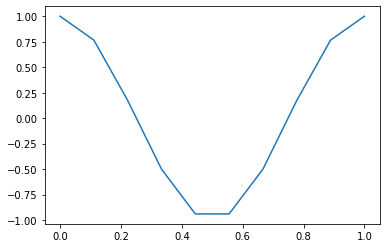

In [4]:

x = np.linspace(0,1, 10)
y = f(x)
e = dist.norm(0,12).rvs(len(x))
y1 = f(x) + e
plt.plot(x, y)

In [5]:
p1 = np.poly1d(np.polyfit(x, y1, deg = 1))
p2 = np.poly1d(np.polyfit(x, y1, deg = 2))
p3 = np.poly1d(np.polyfit(x, y1, deg = 3))
p4 = np.poly1d(np.polyfit(x, y1, deg = 4))
p5 = np.poly1d(np.polyfit(x, y1, deg = 5))
p6 = np.poly1d(np.polyfit(x, y1, deg = 6))
p7 = np.poly1d(np.polyfit(x, y1, deg = 7))
p8 = np.poly1d(np.polyfit(x, y1, deg = 8))
p9 = np.poly1d(np.polyfit(x, y1, deg = 9))


Text(0.5, 1.0, 'P_9')

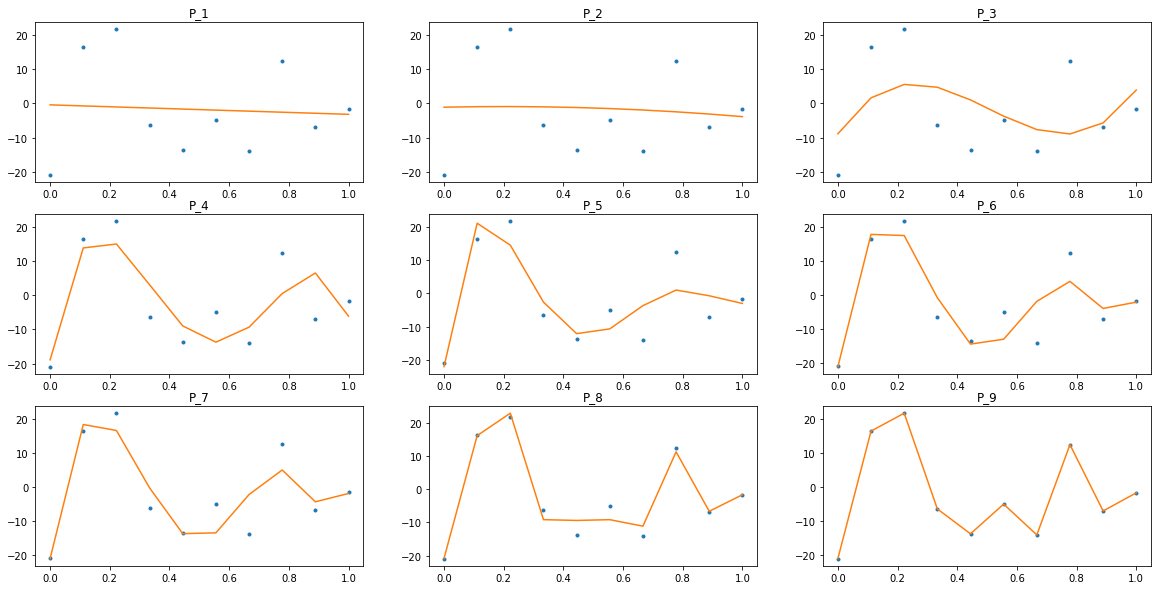

In [6]:
x1 = np.linspace(0, 1, 10) 
_, axi = plt.subplots(3,3, figsize = (20, 10))
axi[0][0].plot(x, y1, '.', x1, p1(x1))
axi[0][0].set_title('P_1')
axi[0][1].plot(x, y1, '.', x1, p2(x1))
axi[0][1].set_title('P_2')
axi[0][2].plot(x, y1, '.', x1, p3(x1))
axi[0][2].set_title('P_3')
axi[1][0].plot(x, y1, '.', x1, p4(x1))
axi[1][0].set_title('P_4')
axi[1][1].plot(x, y1, '.', x1, p5(x1))
axi[1][1].set_title('P_5')
axi[1][2].plot(x, y1, '.', x1, p6(x1))
axi[1][2].set_title('P_6')
axi[2][0].plot(x, y1, '.', x1, p7(x1))
axi[2][0].set_title('P_7')
axi[2][1].plot(x, y1, '.', x1, p8(x1))
axi[2][1].set_title('P_8')
axi[2][2].plot(x, y1, '.', x1, p9(x1))
axi[2][2].set_title('P_9')

In [7]:
table = PrettyTable(['W_1', 'W_2', 'W_3', 'W_4', 'W_5', 'W_6', 'W_7', 'W_8', 'W_9' ])
for x in range (0,10):
    table.add_row([p1[x],p2[x],p3[x],p4[x],p5[x],p6[x],p7[x],p8[x],p9[x]])
    
print(table)

+----------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|         W_1          |         W_2         |        W_3         |         W_4         |         W_5         |         W_6         |         W_7         |         W_8         |         W_9         |
+----------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| -0.41548986676445665 | -1.0979223376634122 | -8.875613859589608 | -18.874596642481507 | -21.966357391787184 | -21.074187735051563 | -21.170271948836902 |  -20.85496432847352 | -20.888544777294765 |
| -2.7677719105106444  |  1.8386472680572552 | 129.89278268262763 |  504.8546370411044  |  786.5140413027341  |  548.4385684034859  |  652.3460961393135  | -1604.2069479608285 |  1901.4131953421456 |


In [8]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse = sqrt (mean_squared_error(y, y1))
print (rmse)

13.40004276024685


In [ ]:
with pm.Model() as model_poly:
    #priors
    W_0 = pm.Normal('Intercepts', mu = 0, sigma = 10, shape = 1)
    W = pm.Normal('Weights', mu = 0, sigma = 10, shape = 4)
    sigma = pm.HalfCauchy('sigma', 10)
    
    #mean
    mu = pm.Deterministic('mu', W_0 + W[1]*np.cos(x) + W[2]* np.cos(x)**2 + W[3]*np.cos(x)**3)
    
    #likelihood
    y = pm.Normal('y', mu = mu, sigma = sigma, observed = y1)
    trace = pm.sample(2000, tune = 1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Weights, Intercepts]
Sampling 4 chains, 0 divergences:  12%|████▉                                   | 1466/12000 [00:21<02:14, 78.20draws/s]